In [4]:
!pip install pandas numpy seaborn matplotlib scikit-learn xgboost

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
df_train= pd.read_csv('/content/Train.csv')
df_test= pd.read_csv('/content/Test.csv')

In [7]:
df_train.head()  # displays the first five rows of the dataframe by default

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
#df_test.head()

In [9]:
df_train.shape  # checking the shape i.e. the number of rows and columns of the DataFrame

(8523, 12)

In [10]:
df_train.isnull().sum()  # checking the number of null values in the dataset

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
df_train.info()   # seeing the detailed info of the dataset and its types of target variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
df_train.describe()  # to generate descriptive statistics that summarize the central tendency, dispersion and
                     # shape of a dataset's distribution, excluding NaN values.

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Item_Weight is numerical column so we fill it with Mean Imputation

In [14]:
df_train['Item_Weight'].describe()  #seeing all the central tendencies of the dataset

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [15]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)  #replacing null values with mean values
df_test['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

In [16]:
df_train.isnull().sum()  #no null values in item weight

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
df_train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

## Outlet_Size is catagorical column so we fill it with Mode Imputation

In [18]:
df_train['Outlet_Size']   #it is a categorical value

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [19]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [20]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [21]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [22]:
df_train.isnull().sum()  #no null value :)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [23]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Dimensionality reduction: Dropping 'Item_Identifier' and 'Outlet_Identifier' columns

In [24]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [25]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [26]:
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.857645,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1
5679,15.300000,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1


## EDA (Exploratory data analysis)

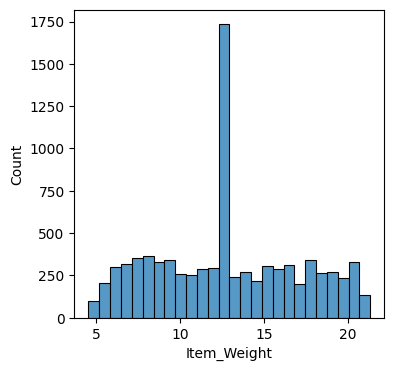

In [27]:
# Item_Weight distribution
plt.figure(figsize=(4,4))
sns.histplot(df_train['Item_Weight'])
plt.show()

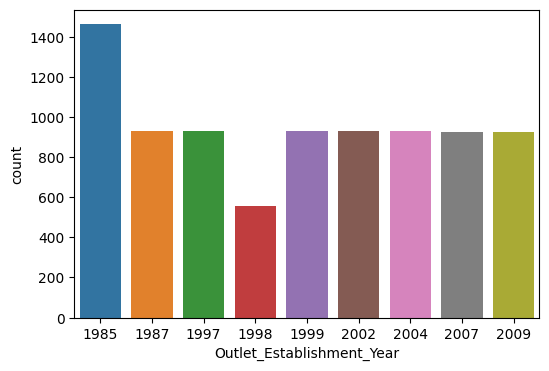

In [28]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,4))
sns.countplot(x='Outlet_Establishment_Year', data=df_train)
plt.show()

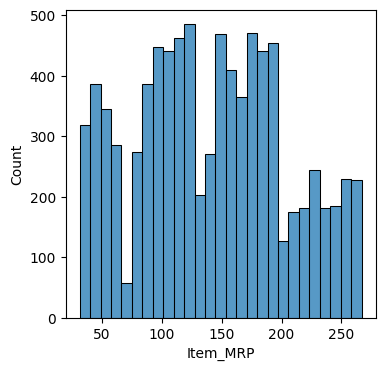

In [29]:
# Item MRP distribution
plt.figure(figsize=(4,4))
sns.histplot(df_train['Item_MRP'])
plt.show()

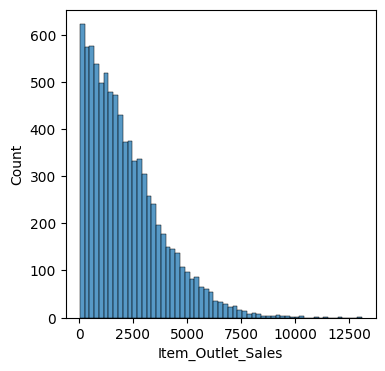

In [30]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(4,4))
sns.histplot(df_train['Item_Outlet_Sales'])
plt.show()

Categorical Features

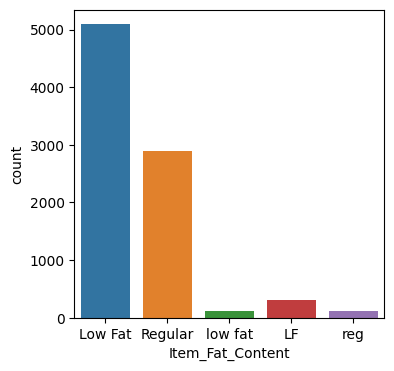

In [31]:
# Item_Fat_Content column
plt.figure(figsize=(4,4))
sns.countplot(x='Item_Fat_Content', data=df_train)
plt.show()

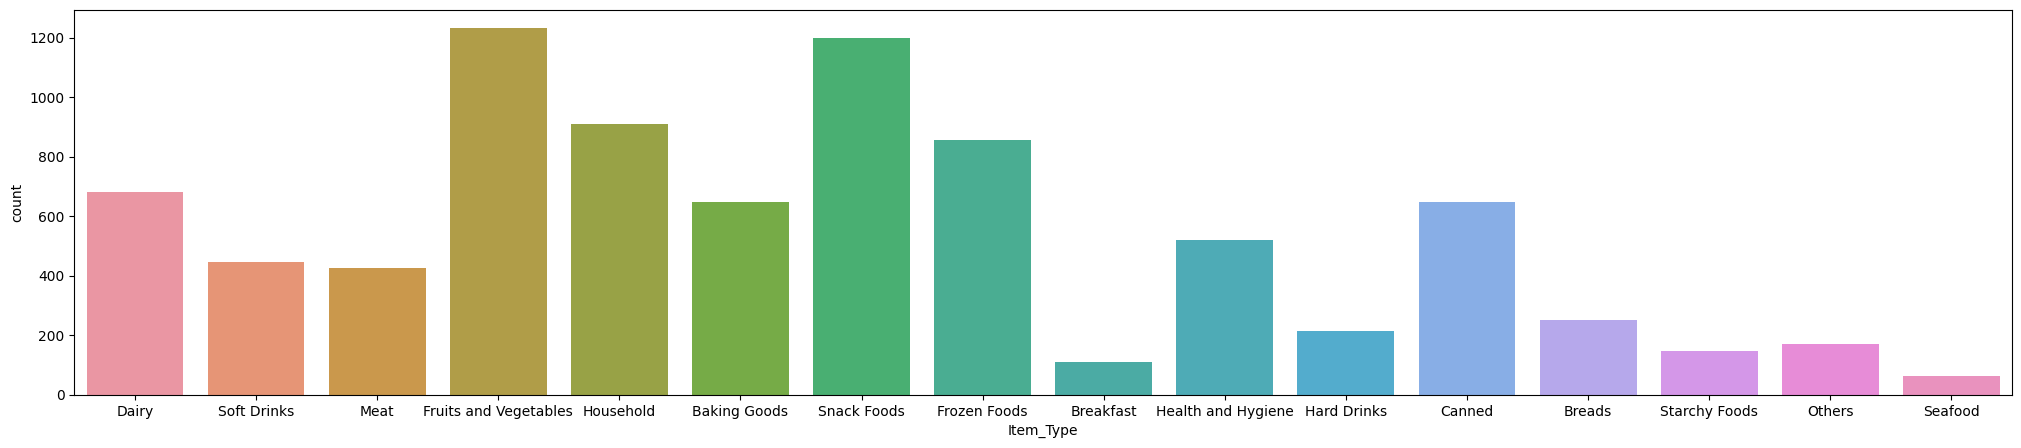

In [32]:
# Item_Type column
plt.figure(figsize=(25,5))
sns.countplot(x='Item_Type', data=df_train)
plt.show()

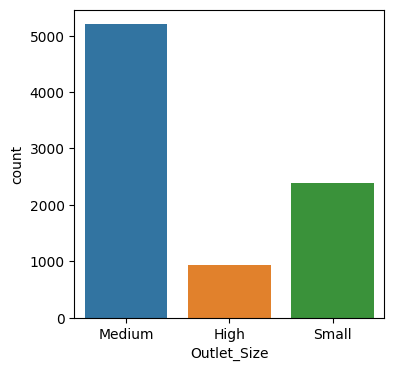

In [33]:
# Outlet_Size column
plt.figure(figsize=(4,4))
sns.countplot(x='Outlet_Size', data=df_train)
plt.show()

<ipython-input-34-4538e358cc2b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot=True)


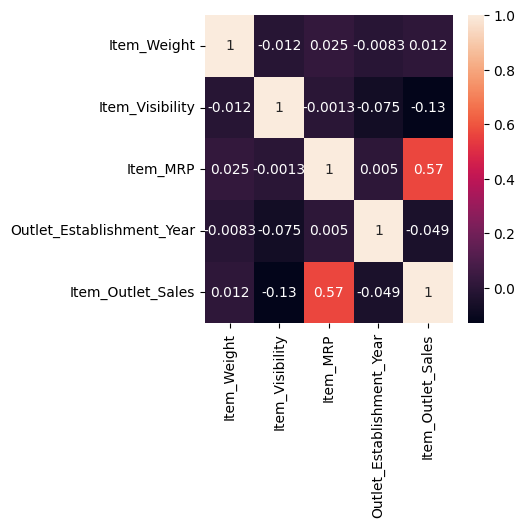

In [34]:
plt.figure(figsize=(4,4))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

## Data cleaning

In [35]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [36]:
df_train[df_train.duplicated()]  # checking for duplicate values

# there are no duplicate records.

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [37]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [38]:
df_train.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Preprocessing Task before Model Building

## 1) Label encoding

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [40]:
df_train['Item_Fat_Content']= le.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type']= le.fit_transform(df_train['Item_Type'])
df_train['Outlet_Size']= le.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type']= le.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type']= le.fit_transform(df_train['Outlet_Type'])

In [41]:
df_train.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


## 2) Splitting our data into train and test files

In [42]:
X=df_train.drop('Item_Outlet_Sales',axis=1)

In [43]:
Y=df_train['Item_Outlet_Sales']

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

## 3)Standarization

In [45]:
X.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,7.226681,140.992782,1997.831867,1.170832,1.112871,1.201220
std,4.226124,0.477836,0.051598,4.209990,62.275067,8.371760,0.600327,0.812757,0.796459
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,0.000000,0.053931,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000
max,21.350000,1.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000


In [46]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [47]:
X_train_std= sc.fit_transform(X_train)  # learning how the data is in X train and then transforming

In [48]:
X_test_std= sc.transform(X_test)

In [49]:
X_train_std

array([[ 1.52290029, -0.74155088,  0.68469729, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.23985603, -0.74155088, -0.09514748, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.54667616,  1.34852514, -0.00838589, ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197107, -0.74155088, -0.9191623 , ...,  1.37953713,
        -1.36527477, -0.25964107],
       [-0.74888428,  1.34852514,  1.21363058, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 0.67885683, -0.74155088,  1.83915356, ..., -0.28872895,
         1.08786619,  0.98524841]])

In [50]:
X_test_std

array([[-0.43860915, -0.74155088, -0.21609255, ..., -0.28872895,
         1.08786619,  0.98524841],
       [ 1.22570189, -0.74155088, -0.52943461, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.21845775,  1.34852514,  0.16277342, ...,  1.37953713,
        -1.36527477, -0.25964107],
       ...,
       [ 0.65508096, -0.74155088,  0.87824237, ..., -0.28872895,
         1.08786619, -1.50453056],
       [ 1.01171904, -0.74155088, -1.28409256, ..., -0.28872895,
         1.08786619,  0.98524841],
       [-1.56558548,  1.34852514, -1.09265374, ..., -0.28872895,
        -0.13870429, -0.25964107]])

In [51]:
Y_train

3684     163.7868
1935    1607.2412
5142    1510.0344
4978    1784.3440
2299    3558.0352
          ...    
599     5502.8370
5695    1436.7964
8006    2167.8448
1361    2700.4848
1547     829.5868
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [52]:
Y_test

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
1317    1721.0930
4996     914.8092
531      370.1848
3891    1358.2320
6629    2418.1856
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

# Model building

In [53]:
X_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8179,11.00,0,0.055163,8,100.3358,2009,1,2,2
8355,18.00,0,0.038979,13,148.6418,1987,0,2,1
3411,7.72,1,0.074731,1,77.5986,1997,2,0,1
7089,20.70,0,0.049035,6,39.9506,2007,1,1,1
6954,7.55,0,0.027225,3,152.9340,2002,1,1,1


In [54]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [56]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [57]:
Y_pred_lr=lr.predict(X_test_std)

In [58]:
r2_score(Y_test,Y_pred_lr)

0.5040717488447088

In [59]:
print('R Squared value = ',r2_score(Y_test,Y_pred_lr))
print('Mean Absolute Error value = ',mean_absolute_error(Y_test,Y_pred_lr))
print('RMSE value = ',np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

R Squared value =  0.5040717488447088
Mean Absolute Error value =  880.9630396797251
RMSE value =  1162.5770379280327


## Random Forest Regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

In [61]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor()

In [62]:
Y_pred_rf= rf.predict(X_test_std)

In [63]:
r2_score(Y_test,Y_pred_rf)

0.5431929214469629

In [64]:
print('R Squared value = ',r2_score(Y_test,Y_pred_rf))
print('Mean Absolute Error value = ',mean_absolute_error(Y_test,Y_pred_rf))
print('RMSE = ',np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

R Squared value =  0.5431929214469629
Mean Absolute Error value =  786.131760003519
RMSE =  1115.780401661452


## XG Boost Regressor

In [65]:
from xgboost import XGBRegressor
xg= XGBRegressor()

In [66]:
xg.fit(X_train_std, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [67]:
Y_pred_xg= xg.predict(X_test_std)

In [68]:
r2_score(Y_test,Y_pred_xg)

0.529884957281212

In [69]:
print('R Squared value = ',r2_score(Y_test,Y_pred_xg))
print('Mean Absolute Error value = ',mean_absolute_error(Y_test,Y_pred_xg))
print('RMSE value = ',np.sqrt(mean_squared_error(Y_test,Y_pred_xg)))

R Squared value =  0.529884957281212
Mean Absolute Error value =  802.7193691164175
RMSE value =  1131.9164991404007


## Hyper parameter tuning

In [80]:
from sklearn.model_selection import GridSearchCV

# define models and parameters
rf_model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=[5,30,50,None]
max_features=["sqrt", "log2", None]
min_samples_split=np.linspace(0.1, 1.0, 5)


param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split
}


grid_search_forest = GridSearchCV(estimator=rf_model, param_grid=param_grid, n_jobs=-1,
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")


Fitting 2 folds for each of 180 candidates, totalling 360 fits
Best: 0.588 using {'max_depth': None, 'max_features': None, 'min_samples_split': 0.1, 'n_estimators': 10}


In [81]:
grid_search_forest.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_split': 0.1,
 'n_estimators': 10}

In [82]:
grid_search_forest.best_score_

0.5877680020817518